<a href="https://colab.research.google.com/github/Shadhin282/Machine-learning-problem-Solving/blob/main/Project_Title_Sentiment_Analysis_on_Amazon_Product_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First of all import some common python libraries which is necessary to continue the program


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
import tensorflow as tf
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Set/amazon Update.csv") #import csv file
df.head() #check the top 5 data rows of total rows and few columns

,reviewText,Positive
0,They call it three next mario??? Are the 'prof...,0
1,Angry People in my book! Any moron who would ...,0
2,Argry Birds is for free to play a games on you...,0
3,cant stand this game. love the concept and pla...,0
4,Don't really know the point of this game. It'...,0


In [ ]:
df.isnull().sum() # checking any missing values

,0
reviewText,0
Positive,0


In [ ]:
df.shape # checking how many rows and columns

(10646, 2)

In [ ]:
# checking the dataset balanceing issue and visualize output status.
label_Status = df['Positive'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Negative & Positive Review Status")

figure.show()

# Creating a function to visualize wordcloud to focus negative and positive words.

In [ ]:

def plot_wordcloud(reviewText,title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviewText)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

negative_text = ' '.join(df[df['Positive'] == 0]['reviewText']) #spam
positive_text = ' '.join(df[df['Positive'] == 1]['reviewText']) #ham

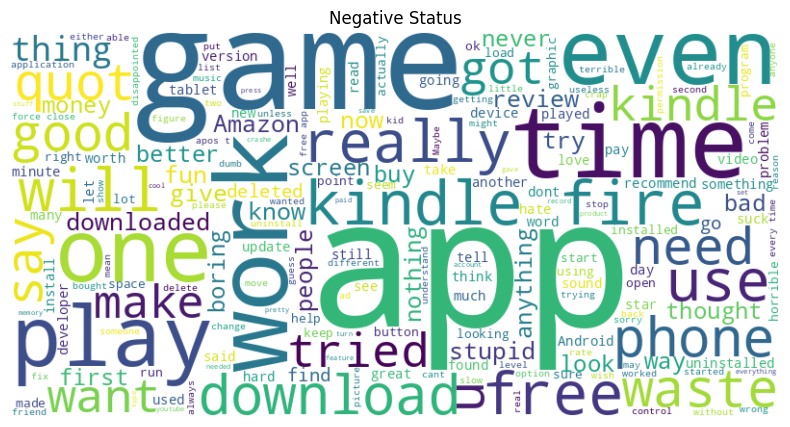

In [ ]:
plot_wordcloud(negative_text, 'Negative Status')
plt.show()

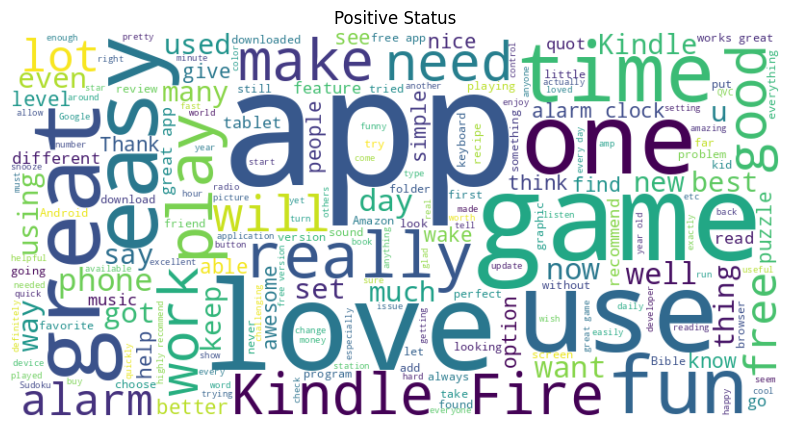

In [ ]:
plot_wordcloud(positive_text, 'Positive Status')
plt.show()

#Here import nltk means natural language toolkit library to process text data

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # importing stopwords to remove those from dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
en_stopwords = set(stopwords.words('english'))
en_stopwords # here show all the english stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
import string
string.punctuation # Here show all the punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#Create a function to remove punctuation and stopwords from dataset

In [ ]:
def preprocess_text(reviewText):

    remove_punc = [char for char in reviewText if char not in string.punctuation] # Remove punctuation
    clean_words = ''.join(remove_punc) # char joining
    split_words = clean_words.split()

    #Remove stopwords
    reviewText = ([word for word in split_words if word.lower() not in en_stopwords]) # stopword = stopwords.words('english')
    return reviewText

In [ ]:
df['reviewText'] = df['reviewText'].apply(preprocess_text)

In [ ]:
df['reviewText'] # here shown clean and tokenize words.

,reviewText
0,"[call, three, next, mario, professional, revie..."
1,"[Angry, People, book, moron, would, waste, tim..."
2,"[Argry, Birds, free, play, games, kindlefireBe..."
3,"[cant, stand, game, love, concept, played, man..."
4,"[Dont, really, know, point, game, almost, impo..."
...,...
10641,"[app, fricken, stupidit, froze, kindle, wont, ..."
10642,"[Please, add, need, neighbors, Ginger1016, tha..."
10643,"[love, game, awesome, wish, free, stuff, house..."
10644,"[love, love, love, app, side, fashion, story, ..."


#Now we will lemmatize words by importing WordNetLemmatizer.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
le = WordNetLemmatizer()

In [ ]:
def lemmatize_text(reviewText):
    lemmatized_text = ' '.join([le.lemmatize(word) for word in reviewText])
    return lemmatized_text

In [ ]:
df['reviewText'] = df['reviewText'].apply(lemmatize_text)
df['reviewText'] # here done lemmatize the words means keep the word in proper meaning

,reviewText
0,call three next mario professional reviewer hi...
1,Angry People book moron would waste time playi...
2,Argry Birds free play game kindlefireBecause f...
3,cant stand game love concept played many type ...
4,Dont really know point game almost impossible ...
...,...
10641,app fricken stupidit froze kindle wont allow p...
10642,Please add need neighbor Ginger1016 thanks bun...
10643,love game awesome wish free stuff house didnt ...
10644,love love love app side fashion story fight wo...


In [ ]:
df['reviewText'][0] #here shown first  row after lemmatize

'call three next mario professional reviewer high Ask fling bird bone zero replay value'

#After lemmatize now will present the words in vector that's why import Tfidfectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
x = vectorizer.fit_transform(df['reviewText']) # here fit transfer text data into vector and separate independent features

In [ ]:
y = df['Positive'] # separate output

#split the train data and test data by train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
xtrain.shape

(7452, 15712)

In [ ]:
xtest.shape

(3194, 15712)

In [ ]:
ytrain.shape

(7452,)

In [ ]:
ytest.shape

(3194,)

In [ ]:
xtrain[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# make a function to evaluate classification data
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

#First import Multinomial Naive byes model and show its peroformance

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8706950532247965,
 'Confusion Matrix': array([[1103,  293],
        [ 120, 1678]])}

In [ ]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[1103,  293],
       [ 120, 1678]])

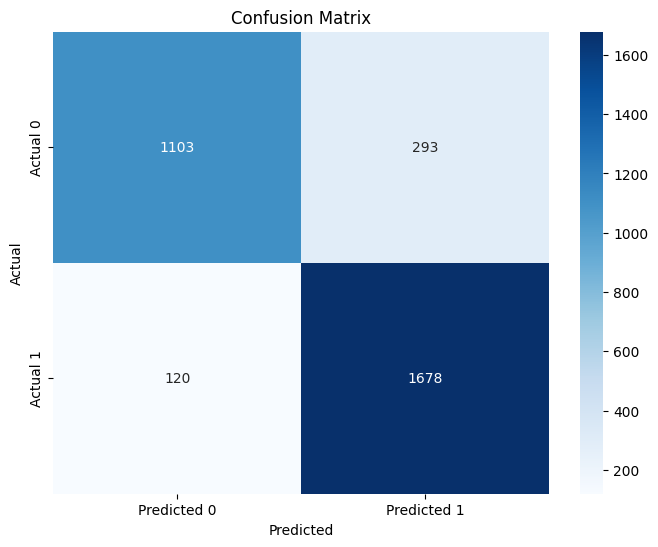

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1396
           1       0.85      0.93      0.89      1798

    accuracy                           0.87      3194
   macro avg       0.88      0.86      0.87      3194
weighted avg       0.87      0.87      0.87      3194



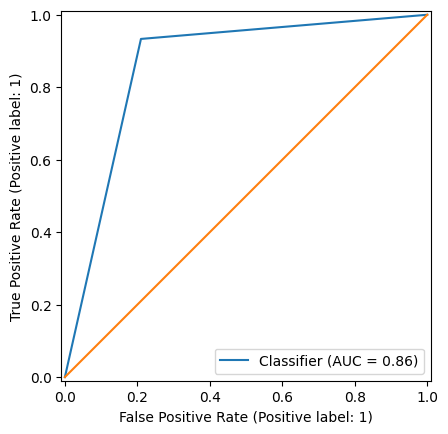

In [ ]:
RocCurveDisplay.from_predictions(ytest, mnb_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

#Here import Bernoulli Naive Byes model and shown its performance

In [ ]:
bnb_model = BernoulliNB()
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'Accuracy': 0.8810269254852849,
 'Confusion Matrix': array([[1218,  178],
        [ 202, 1596]])}

In [ ]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[1218,  178],
       [ 202, 1596]])

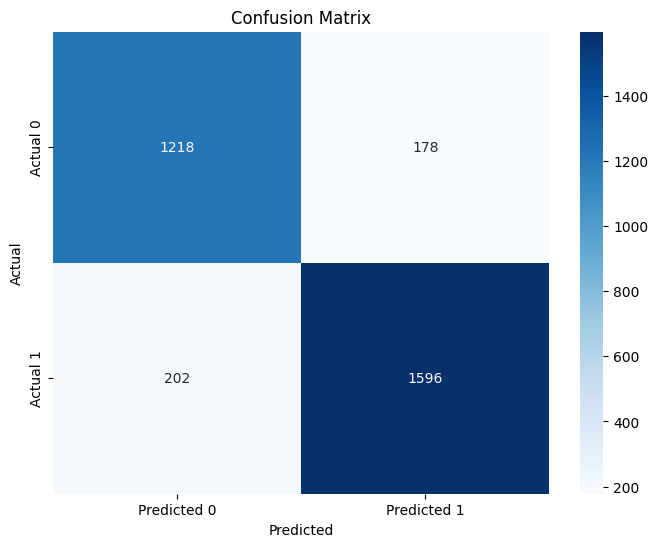

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

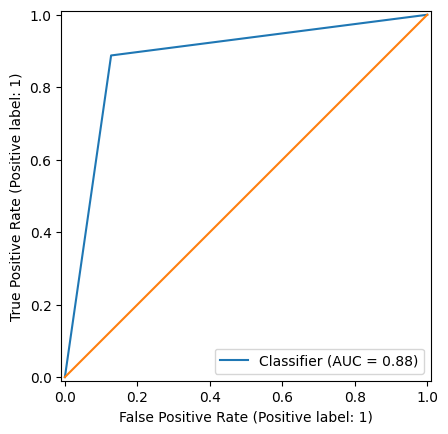

In [ ]:
RocCurveDisplay.from_predictions(ytest, bnb_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

#Thirdly import Logistic Regression model and show performance

In [ ]:
lr_model = LogisticRegression(max_iter=1000, penalty='l2')
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
lr_results = evaluate_model(lr_model, xtest, ytest)
lr_results

{'Accuracy': 0.8869755792110207,
 'Confusion Matrix': array([[1223,  173],
        [ 188, 1610]])}

In [ ]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

array([[1223,  173],
       [ 188, 1610]])

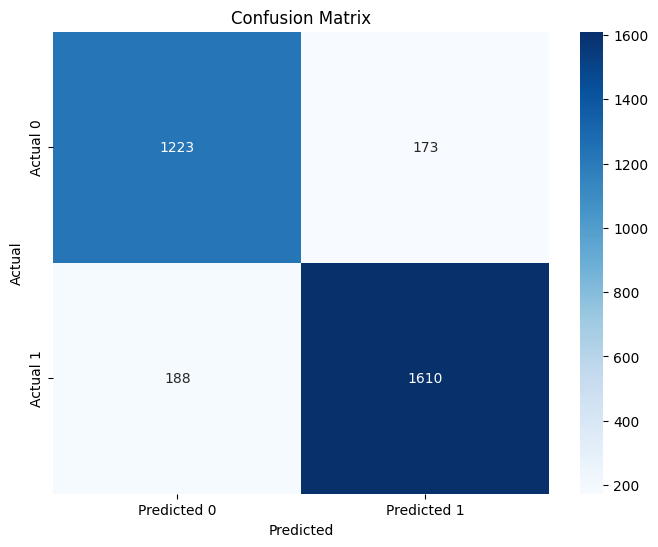

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

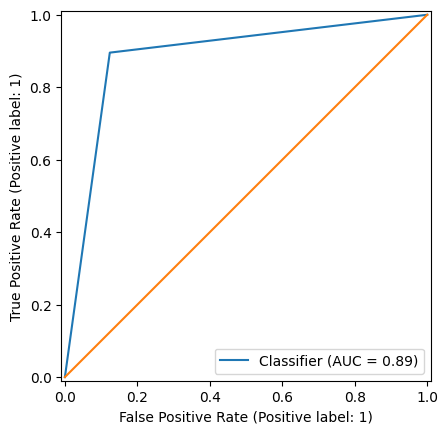

In [ ]:
RocCurveDisplay.from_predictions(ytest, lr_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

#Here Visualize the models performance

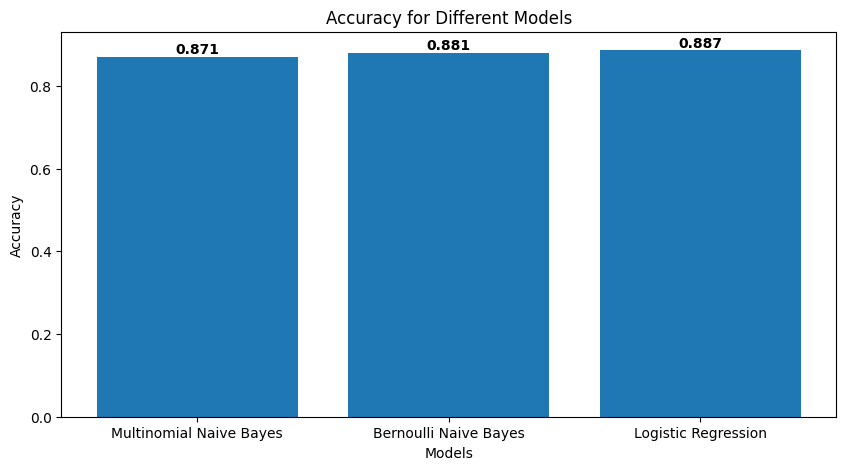

In [ ]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

#Again import Support Vector Classifier and to check performance

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='poly', random_state=0)
svm.fit(xtrain, ytrain)

SVC(kernel='poly', random_state=0)

In [ ]:
svm_results = evaluate_model(svm, xtest, ytest)
svm_results

{'Accuracy': 0.7927363807138385,
 'Confusion Matrix': array([[ 781,  615],
        [  47, 1751]])}

In [ ]:
svm_CM = confusion_matrix(ytest, svm.predict(xtest))
svm_CM

array([[ 781,  615],
       [  47, 1751]])

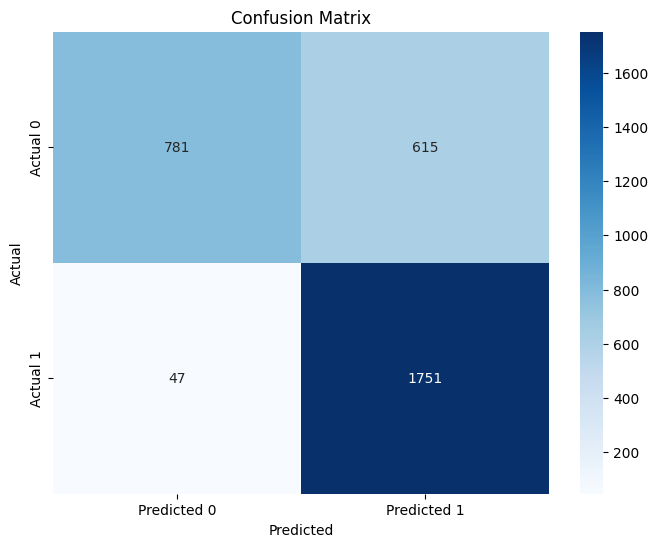

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(svm_CM, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

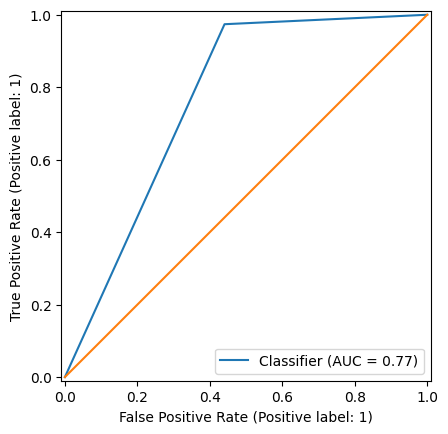

In [ ]:
RocCurveDisplay.from_predictions(ytest, svm.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

#Again Visualize the performance of the models

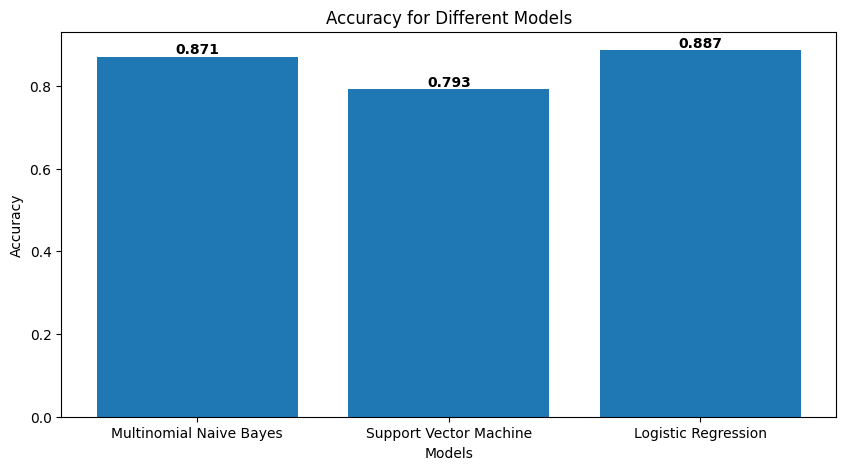

In [ ]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [nb_results['Accuracy'], svm_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

#Here did Hyperparameter tuning to find the best parameters for the models.

In [ ]:
lr_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lr_randomizedsearchcv = RandomizedSearchCV(estimator=SVC(),
                                           param_distributions=lr_params,
                                           n_iter= 10, cv=2, random_state=42)

In [ ]:
lr_random = lr_randomizedsearchcv.fit(xtrain, ytrain)

In [ ]:
lr_random.cv_results_

{'mean_fit_time': array([1.9072547 , 1.74283326, 2.02870941, 2.2404319 , 2.09649467,
        2.18474066, 1.45576966, 2.1264509 , 2.08172762, 2.3010844 ]),
 'std_fit_time': array([0.01132131, 0.23216474, 0.09297895, 0.25278819, 0.02902246,
        0.30079973, 0.01162517, 0.14599884, 0.06884992, 0.27375567]),
 'mean_score_time': array([1.06392741, 1.66295779, 1.8140409 , 1.23637426, 1.87650084,
        1.23903275, 1.22483683, 1.97580481, 1.85767603, 2.02421296]),
 'std_score_time': array([0.01150775, 0.23406971, 0.02284169, 0.13611615, 0.02524304,
        0.06321812, 0.00073624, 0.21359396, 0.00294518, 0.12119091]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'linear', 'poly', 'linear',
                    'linear', 'linear', 'poly', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 0.01, 1.0, 0.001, 0.1, 0.1,

In [ ]:
lr_random.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 1}

In [ ]:
svm2 = SVC(kernel='linear', gamma=1 , C=1, random_state=0)
svm2.fit(xtrain, ytrain)

SVC(C=1, gamma=1, kernel='linear', random_state=0)

In [ ]:
svm_results2 = evaluate_model(svm, xtest, ytest)
svm_results2

{'Accuracy': 0.7927363807138385,
 'Confusion Matrix': array([[ 781,  615],
        [  47, 1751]])}

In [ ]:
svm_CM2 = confusion_matrix(ytest, svm2.predict(xtest))
svm_CM2

array([[1230,  166],
       [ 215, 1583]])

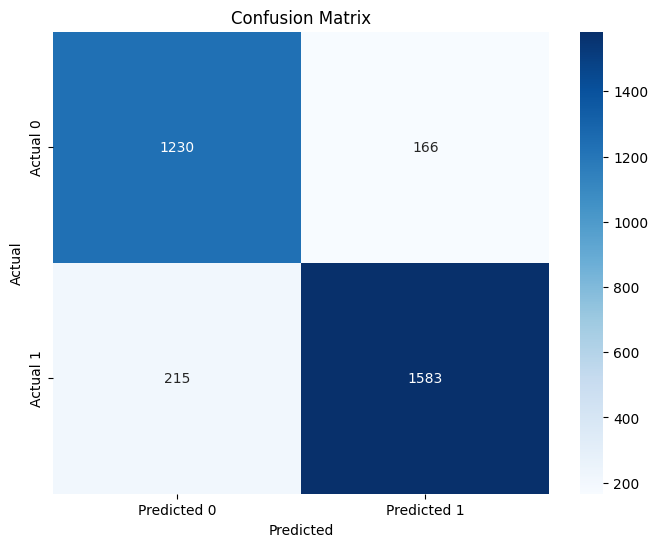

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(svm_CM2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

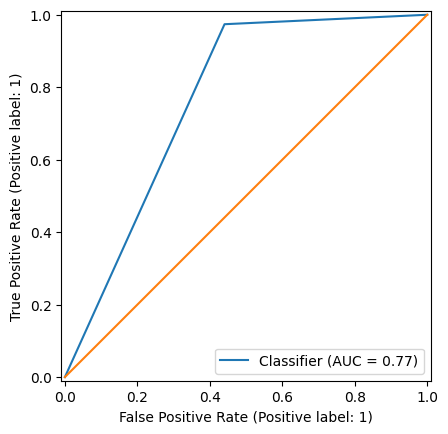

In [ ]:
RocCurveDisplay.from_predictions(ytest, svm.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

##Here we get maximum score by using Logistic Regression model which is 88% accurate results will be provided.

#### I try to implement the knowledge that i learn from the course as belive that more i have to learn to improve my skill. Rest is it was a good feeling to work in this project.